In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.layers import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2,MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

reading data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/classy/dataset/train_set.csv')

In [4]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

data split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [6]:
y_train

146        happy
762     insecure
866     insecure
1131    insecure
256        happy
          ...   
1228    insecure
1077    insecure
1318      closed
723     insecure
815     insecure
Name: class, Length: 1138, dtype: object

feature label encoding

In [7]:
happy = [1,0,0,0,0]
sad = [0,1,0,0,0]
insecure = [0,0,1,0,0]
closed = [0,0,0,1,0]
open = [0,0,0,0,1]
new_y_train = []
new_y_test = []

In [8]:
for i in y_train:
  if i=='happy':
    new_y_train.append(happy)
  if i=='sad':
    new_y_train.append(sad)
  if i=='insecure':
    new_y_train.append(insecure)
  if i=='closed':
    new_y_train.append(closed)
  if i=='open':
    new_y_train.append(open)

for i in y_test:
  if i=='happy':
    new_y_test.append(happy)
  if i=='sad':
    new_y_test.append(sad)
  if i=='insecure':
    new_y_test.append(insecure)
  if i=='closed':
    new_y_test.append(closed)
  if i=='open':
    new_y_test.append(open)

In [9]:
new_y_train = np.array(new_y_train)
new_y_test = np.array(new_y_test)

In [10]:
new_y_train

array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

data scailing

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train.shape

(1138, 2004)

In [13]:
x_train = np.reshape(X_train,newshape=(1138,167,4,3))

In [14]:
X_test.shape

(489, 2004)

In [15]:
x_test = np.reshape(X_test,newshape=(489,167,4,3))

bulding a model

In [16]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=120, kernel_size=1, activation='relu',input_shape=[167,4,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 167, 4, 120)       480       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 83, 2, 120)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 19920)             0         
                                                                 
 dense (Dense)               (None, 128)               2549888   
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 2,551,013
Trainable params: 2,551,013
Non-trainable params: 0
______________________________________________

callbacks

In [17]:
filepath="/content/drive/MyDrive/classy/saved model/cnnNew/weights-improvement-{epoch:02d}-{loss:.27}-{accuracy:.2f}.hdf5"
# checkpoint - saves the model weight when the accuracy improves during the training process
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
# early_stop - if the accuracy does not improves for 5 epochs the training will stop to avoid overfitting
early_stop = EarlyStopping(monitor='accuracy', patience=5, verbose=1)
callbacks_list = [checkpoint, early_stop]

In [18]:
cnn.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model training

In [ ]:
history = cnn.fit(x = x_train, y = new_y_train, epochs= 40,callbacks=callbacks_list)

Epoch 1/40
36/36 [==============================] - ETA: 0s - loss: 1.1135 - accuracy: 0.6538
Epoch 1: accuracy improved from -inf to 0.65378, saving model to /content/drive/MyDrive/classy/saved model/cnnNew/weights-improvement-01-1.11345672607421875-0.65.hdf5
36/36 [==============================] - 3s 51ms/step - loss: 1.1135 - accuracy: 0.6538
Epoch 2/40
35/36 [============================>.] - ETA: 0s - loss: 0.3948 - accuracy: 0.8438
Epoch 2: accuracy improved from 0.65378 to 0.84359, saving model to /content/drive/MyDrive/classy/saved model/cnnNew/weights-improvement-02-0.3940298557281494140625-0.84.hdf5
36/36 [==============================] - 2s 50ms/step - loss: 0.3940 - accuracy: 0.8436
Epoch 3/40
35/36 [============================>.] - ETA: 0s - loss: 0.2695 - accuracy: 0.9027
Epoch 3: accuracy improved from 0.84359 to 0.90246, saving model to /content/drive/MyDrive/classy/saved model/cnnNew/weights-improvement-03-0.2692055404186248779296875-0.90.hdf5
36/36 [===============

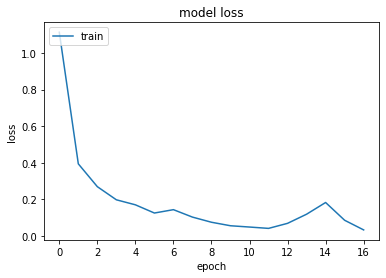

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

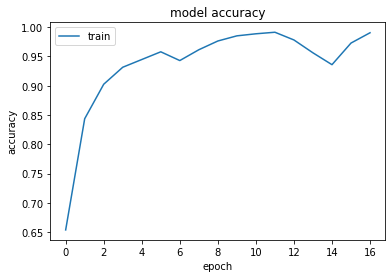

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

loading best trained weights

In [19]:
cnn.load_weights('/content/drive/MyDrive/classy/saved model/cnnNew/weights-improvement-12-0.041181392967700958251953125-0.99.hdf5')

In [20]:
new_y_test.shape

(489, 5)

In [ ]:
cnn.evaluate(x=x_test,y=new_y_test)

16/16 [==============================] - 0s 10ms/step - loss: 0.0778 - accuracy: 0.9775


[0.07777170091867447, 0.977505087852478]

In [ ]:
singel_pred=X_test[1]
singel_pred = np.reshape(singel_pred,newshape=(1,167,4,3))
singel_pred.shape

(1, 167, 4, 3)

In [ ]:
new_y_test[1]

array([0, 0, 1, 0, 0])

In [67]:
len(X_test)

489

In [ ]:
result = cnn.predict(singel_pred)

1/1 [==============================] - 0s 22ms/step


In [ ]:
result.shape

(1, 5)

In [ ]:
j=0
p=2
a=0
for i in result[0]:
  if(p!=2):
    if(i>p):
      p=i
      a=j
  else:
    p=i
  j=j+1

if a==0:
  print('class happy ',p)
if a==1:
  print('class sad ',p)
if a==2:
  print('class insecure ',p)
if a==3:
  print('class closed ',p)
if a==4:
  print('class open ',p)

class insecure  0.99864465


In [ ]:
print('1',result[0][0])
print('2',result[0][1])
print('3',result[0][2])
print('4',result[0][3])
print('5',result[0][4])

1 0.0012224453
2 0.00013285775
3 0.99864465
4 2.8360423e-08
5 2.0686098e-08


In [21]:
l=[]

In [22]:
l.append([0.9,0.2,0.4,0.1,0.04])

In [23]:
x = ['asdfsdfsdf']

In [24]:
len(x)

1

In [79]:
columns_names = ['heppy','sad','insecure','closed','open']
to_save = pd.DataFrame(columns=columns_names)

In [66]:
result[0]

array([9.9040622e-01, 3.0890284e-08, 6.4809625e-12, 9.5936079e-03,
       1.2506450e-07], dtype=float32)

In [80]:
#df = pd.read_csv('/content/drive/MyDrive/classy/dataset/train_set.csv')
#X = df.drop('class', axis=1)
for i in range(480):
  arr = np.array(X)
  pred = arr[i]
  pred = np.reshape(pred,newshape=(-1,1))
  sc = StandardScaler()
  input = sc.fit_transform(pred)
  input = np.reshape(input,newshape=(1,167,4,3))
  result = cnn.predict(input)
  new_row = []
  for j in result[0]:
    new_row.append(j)
  to_save.loc[len(to_save)] = new_row
to_save.to_csv(path_or_buf='/content/drive/MyDrive/classy/pred2.csv',)

1/1 [==============================] - 0s 39ms/step


In [81]:
to_save

,heppy,sad,insecure,closed,open
0,0.244466,0.755427,2.827744e-06,0.000104,1.172171e-09
1,0.719689,0.280197,2.403756e-07,0.000114,1.038890e-09
2,0.841200,0.158705,9.910777e-08,0.000095,9.687889e-10
3,0.892810,0.107093,5.445763e-08,0.000097,8.503886e-10
4,0.908797,0.091117,4.056468e-08,0.000087,7.587005e-10
...,...,...,...,...,...
475,0.220729,0.779220,4.170614e-07,0.000051,3.481113e-10
476,0.219896,0.780047,4.803244e-07,0.000056,3.602711e-10
477,0.197229,0.802712,5.626495e-07,0.000058,3.484371e-10
478,0.211172,0.788769,5.836672e-07,0.000059,4.214038e-10
